In [68]:

!pip3 install wordcloud
!pip3 install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


In [69]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
from datetime import datetime, date, time
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator


import re
import nltk
from nltk.corpus import stopwords
import unicodedata
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize



In [70]:
twitter=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/twitter_regression.csv")
reddit=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/reddit_regression.csv")
training_data=pd.read_csv("/Users/rebeccaharrison/Documents/Python/Bootcamp/Hate_speech_project/prepared_hate_data_train.csv")

/Users/rebeccaharrison/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/rebeccaharrison/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
# lemmatizing the data and removing stopwords
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') 
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
# Describing the words that are most common for  hate crime 
outcome_variables= ['Hate speech','Religion','Ethnicity/Race','Gender','Sexuality and Sexual preference','Ableness / disability','Immigration status']
for variable in outcome_variables:
    hate_words = basic_clean(''.join(str(training_data['text'].loc[training_data[variable]==1].tolist())))
    one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
    one_gram.sort_values().plot.barh(color='blue', width=.9, figsize=(4, 4))
    plt.title('20 Most Frequently Occuring Unigrams for '+str(variable)+' in dynamically generated dataset')
    plt.ylabel('Unigram')
    plt.xlabel('# of Occurances')
    plt.show()

In [ ]:
# Describing the words that are most commonly occuring in the twitter and reddit datasets

hate_words = basic_clean(''.join(str(twitter['text_nostop'].loc[twitter['rule']=="Worldcup"].tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='blue', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for in twitter dataset for topics flagged as Worldcup')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

hate_words = basic_clean(''.join(str(twitter['text_nostop'].loc[twitter['rule']=="England France"].tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='blue', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for in twitter dataset for topics flagged as England France')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

hate_words = basic_clean(''.join(str(twitter['text_nostop'].loc[twitter['rule']=="Players"].tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='blue', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for in twitter dataset for topics flagged as players')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

hate_words = basic_clean(''.join(str(reddit.text_nostop.tolist())))
one_gram=(pd.Series(nltk.ngrams(hate_words, 1)).value_counts())[:20]
one_gram.sort_values().plot.barh(color='blue', width=.9, figsize=(4, 4))
plt.title('20 Most Frequently Occuring Unigrams for in reddit dataset')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')
plt.show()

In [71]:
twitter['created']=pd.to_datetime(twitter['created'])
twitter

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1            id  \
0                0             0             5.0  1.601650e+18   
1                1             1             6.0  1.601650e+18   
2                2             2            11.0  1.601650e+18   
3                3             3            13.0  1.601650e+18   
4                4             4            18.0  1.601650e+18   
...            ...           ...             ...           ...   
175485      175485        161878             NaN           NaN   
175486      175486        166261             NaN           NaN   
175487      175487        167266             NaN           NaN   
175488      175488        171672             NaN           NaN   
175489      175489        172500             NaN           NaN   

                         created  \
0      2022-12-10 18:29:58+00:00   
1      2022-12-10 18:29:57+00:00   
2      2022-12-10 18:29:57+00:00   
3      2022-12-10 18:29:58+00:00   
4      2022-12-10 18:29:58+00:00   
...                          ...   
175485                       NaT   
175486                       NaT   
175487                       NaT   
175488                       NaT   
175489                       NaT   

                                                     text possibly_sensitive  \
0       WE LOVE LIAM PAYNE 💗\n #EnglandVsFrance #Engla...              False   
1                       What has Islam got to do with it?              False   
2         2002. That was also the Cup where Nigeria bo...              False   
3        Grant Wahl was a healthy individual just like...              False   
4                    #ssfootball France 🇫🇷 2 England 🇬🇧 1              False   
...                                                   ...                ...   
175485                                                NaN                NaN   
175486                                                NaN                NaN   
175487                                                NaN                NaN   
175488                                                NaN                NaN   
175489                                                NaN                NaN   

                                  user verified            rule  ...   ps  \
0                                Judit    False  England France  ...  0.0   
1                      Antonio Plescia    False        Worldcup  ...  0.0   
2       Shiv Ramdas Traing To Rite Buk     True  England France  ...  0.0   
3                        Porfirio Diaz    False        Worldcup  ...  0.0   
4                          Vinny Munda    False  England France  ...  0.0   
...                                ...      ...             ...  ...  ...   
175485                             NaN      NaN             NaN  ...  NaN   
175486                             NaN      NaN             NaN  ...  NaN   
175487                             NaN      NaN             NaN  ...  NaN   
175488                             NaN      NaN             NaN  ...  NaN   
175489                             NaN      NaN             NaN  ...  NaN   

         pa  rci  ddf  hurtlex  capital_letters    neg    neu    pos  compound  
0       0.0  0.0  0.0      0.0             21.0  0.000  0.549  0.451    0.7125  
1       0.0  0.0  0.0      0.0              2.0  0.000  1.000  0.000    0.0000  
2       0.0  0.0  0.0      0.0              5.0  0.000  1.000  0.000    0.0000  
3       0.0  0.0  0.0      0.0              9.0  0.268  0.336  0.396    0.4033  
4       0.0  0.0  0.0      0.0              2.0  0.000  1.000  0.000    0.0000  
...     ...  ...  ...      ...              ...    ...    ...    ...       ...  
175485  NaN  NaN  NaN      NaN              NaN  0.000  1.000  0.000    0.0000  
175486  NaN  NaN  NaN      NaN              NaN  0.000  1.000  0.000    0.0000  
175487  NaN  NaN  NaN      NaN              NaN  0.000  1.000  0.000    0.0000  
175488  NaN  NaN  NaN      NaN              NaN  0.000  1.000  0.000    0.0000  
17548

In [72]:
reddit['date']=pd.to_datetime(reddit['created'],unit='s')


In [73]:
print("Reddit dates from:",min(reddit['date']),"to",max(reddit['date']))
print("Twitter dates from:",min(twitter['created']),"to",max(twitter['created']))

Reddit dates from: 2022-12-04 23:51:10 to 2022-12-10 21:33:24
Twitter dates from: 2022-12-10 18:29:57+00:00 to 2022-12-10 21:01:24+00:00


In [74]:
reddit=reddit.loc[reddit['date']>='2022-12-10']
reddit=reddit.loc[reddit['date'].dt.time >=time(18,29)]

In [75]:
print("Reddit dates from:",min(reddit['date']),"to",max(reddit['date']))
print("Twitter dates from:",min(twitter['created']),"to",max(twitter['created']))

Reddit dates from: 2022-12-10 18:29:16 to 2022-12-10 21:33:24
Twitter dates from: 2022-12-10 18:29:57+00:00 to 2022-12-10 21:01:24+00:00


In [76]:
reddit = reddit.replace({'log_regression': {1: 'Hate', 0: 'Not hate'}})
twitter = twitter.replace({'log_regression': {1: 'Hate', 0: 'Not hate',}})
twitter = twitter.replace({'possibly_sensitive': {True: 'Sensitive', False: 'Not sensitive',}})
twitter = twitter.replace({'random_forest': {1: 'Hate', 0: 'Not hate',}})
twitter = twitter.replace({'neural_network': {1: 'Hate', 0: 'Not hate',}})
reddit = reddit.replace({'random_forest': {1: 'Hate', 0: 'Not hate',}})
reddit = reddit.replace({'neural_network': {1: 'Hate', 0: 'Not hate',}})

In [77]:
twitter['random_forest']

0             Hate
1         Not hate
2         Not hate
3         Not hate
4             Hate
            ...   
175485        Hate
175486        Hate
175487        Hate
175488    Not hate
175489    Not hate
Name: random_forest, Length: 175490, dtype: object

In [89]:


#Creating count and percentage of log regression hate
reddit_log_graph = (
    reddit
    .groupby(reddit['date'].map(lambda x: x.replace(second=0)))['log_regression']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
reddit_log_graph['Hate percentage']=reddit_log_graph['Hate']/(reddit_log_graph['Hate']+reddit_log_graph['Not hate'])*100

tw_log_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['log_regression']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_log_graph['Hate percentage']=tw_log_graph['Hate']/(tw_log_graph['Hate']+tw_log_graph['Not hate'])*100



#Creating count and percentage of log regression hate for twitter where world cup is flagged

tw_log_graph_wconly = (
    twitter.loc[twitter['rule']=='Worldcup']
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['log_regression']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_log_graph_wconly['Hate percentage']=tw_log_graph_wconly['Hate']/(tw_log_graph_wconly['Hate']+tw_log_graph_wconly['Not hate'])*100

#The same for random forest
reddit_rando_graph = (
    reddit
    .groupby(reddit['date'].map(lambda x: x.replace(second=0)))['random_forest']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
reddit_rando_graph['Hate percentage']=reddit_rando_graph['Hate']/(reddit_rando_graph['Hate']+reddit_rando_graph['Not hate'])*100


tw_rando_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['random_forest']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_rando_graph['Hate percentage']=tw_rando_graph['Hate']/(tw_rando_graph['Hate']+tw_rando_graph['Not hate'])*100

# And also for the neural network
reddit_ann_graph = (
    reddit
    .groupby(reddit['date'].map(lambda x: x.replace(second=0)))['neural_network']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
reddit_ann_graph['Hate percentage']=reddit_ann_graph['Hate']/(reddit_ann_graph['Hate']+reddit_ann_graph['Not hate'])*100


tw_ann_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['neural_network']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
tw_ann_graph['Hate percentage']=tw_ann_graph['Hate']/(tw_ann_graph['Hate']+tw_ann_graph['Not hate'])*100

In [79]:
#Creating count and percentage of sensitive stuff picked up through twitter
twitter_sensitive_graph = (
    twitter
    .groupby(twitter['created'].map(lambda x: x.replace(second=0)))['possibly_sensitive']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)
twitter_sensitive_graph['Hate percentage']=twitter_sensitive_graph['Sensitive']/(twitter_sensitive_graph['Sensitive']+twitter_sensitive_graph['Not sensitive'])*100


In [80]:
tw_log_graph.head()

log_regression                   created  Hate  Not hate  Hate percentage
0              2022-12-10 18:29:00+00:00     7        27        20.588235
1              2022-12-10 18:30:00+00:00   203       729        21.781116
2              2022-12-10 18:31:00+00:00   204       664        23.502304
3              2022-12-10 18:32:00+00:00   196       676        22.477064
4              2022-12-10 18:33:00+00:00   183       697        20.795455

<ipython-input-113-f89f63a7b075>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

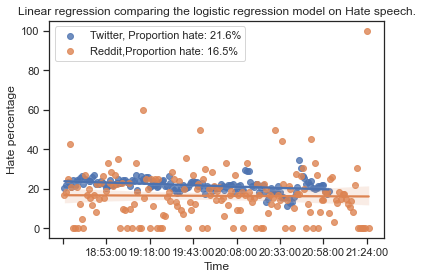

In [113]:
sns.set_theme(style="ticks")

proportion_twitter_logreg=twitter['log_regression'].value_counts(normalize=True)
proportion_twitter_logreg=round(proportion_twitter_logreg[1]*100,ndigits=1)
proportion_reddit_logreg=reddit['log_regression'].value_counts(normalize=True)
proportion_reddit_logreg=round(proportion_reddit_logreg[1]*100,ndigits=1)


# converting to readable format for regplot
tw_log_graph = tw_log_graph.sort_values('created')
tw_log_graph['date_f'] = pd.factorize(tw_log_graph['created'])[0] + 1
mapping = dict(zip(tw_log_graph['date_f'], tw_log_graph['created'].dt.time))

reddit_log_graph = reddit_log_graph.sort_values('date')
reddit_log_graph['date_f'] = pd.factorize(reddit_log_graph['date'])[0] + 1
mapping = dict(zip(reddit_log_graph['date_f'], reddit_log_graph['date'].dt.time))

# Plot the log regression comparison
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Twitter, Proportion hate: "+str(proportion_twitter_logreg)+"%"),
             data=tw_log_graph)
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Reddit,Proportion hate: "+str(proportion_reddit_logreg)+"%"),
             data=reddit_log_graph)
plt.title("Linear regression comparing the logistic regression model on Hate speech.")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
plt.legend()
plt.xlabel("Time")


In [99]:
twitter_count=twitter['log_regression'].value_counts(normalize=True)
round(twitter_count[1]*100,ndigits=1)

21.6

<ipython-input-115-c0f5239232a1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

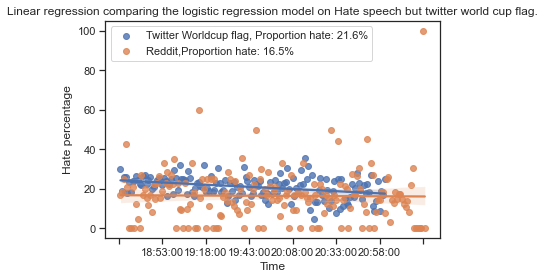

In [115]:
tw_log_graph_wconly

# converting to readable format for regplot
tw_log_graph_wconly = tw_log_graph_wconly.sort_values('created')
tw_log_graph_wconly['date_f'] = pd.factorize(tw_log_graph_wconly['created'])[0] + 1
mapping = dict(zip(tw_log_graph_wconly['date_f'], tw_log_graph_wconly['created'].dt.time))

proportion_twitter_logreg_worldcup=twitter['log_regression'].loc[twitter['rule']=="Worldcup"].value_counts(normalize=True)
proportion_twitter_logreg_worldcup=round(proportion_twitter_logreg_worldcup[1]*100,ndigits=1)


# Plot the log regression comparison
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Twitter Worldcup flag, proportion hate: "+str(proportion_twitter_logreg_worldcup)+"%"),
             data=tw_log_graph_wconly)
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Reddit, proportion hate: "+str(proportion_reddit_logreg)+"%"),
             data=reddit_log_graph)
plt.title("Linear regression comparing the logistic regression model on Hate speech but twitter world cup flag.")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)

plt.legend()
plt.xlabel("Time")

<ipython-input-82-2eb8aec3682b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

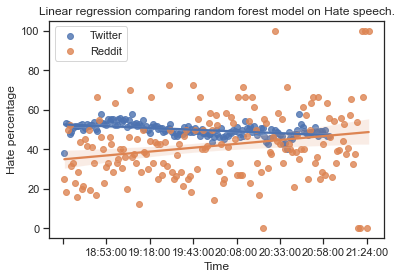

In [82]:
#comparing the random forest

proportion_twitter_rando=twitter['random_forest'].value_counts(normalize=True)
proportion_twitter_rando=round(proportion_twitter_rando[1]*100,ndigits=1)
proportion_reddit_rando=reddit['random_forest'].value_counts(normalize=True)
proportion_reddit_rando=round(proportion_reddit_rando[1]*100,ndigits=1)

sns.set_theme(style="ticks")
# converting to readable format for regplot
tw_rando_graph = tw_rando_graph.sort_values('created')
tw_rando_graph['date_f'] = pd.factorize(tw_rando_graph['created'])[0] + 1
mapping = dict(zip(tw_rando_graph['date_f'], tw_rando_graph['created'].dt.time))

reddit_rando_graph = reddit_rando_graph.sort_values('date')
reddit_rando_graph['date_f'] = pd.factorize(reddit_rando_graph['date'])[0] + 1
mapping = dict(zip(reddit_rando_graph['date_f'], reddit_rando_graph['date'].dt.time))

# Plot the log regression comparison
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Twitter Worldcup flag, proportion hate: "+str(proportion_twitter_rando)+"%"),
             data=tw_rando_graph)
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Reddit, proportion hate: "+str(proportion_reddit_rando)+"%"),
             data=reddit_rando_graph)
plt.title("Linear regression comparing random forest model on Hate speech.")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
plt.legend()
plt.xlabel("Time")

<ipython-input-117-edc51f557fd8>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

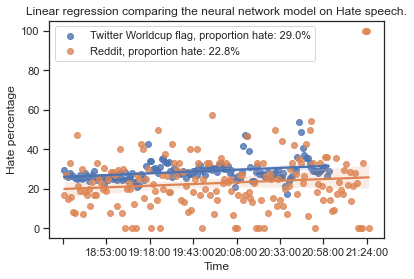

In [117]:
#comparing the neural network

proportion_twitter_ann=twitter['neural_network'].value_counts(normalize=True)
proportion_twitter_ann=round(proportion_twitter_ann[1]*100,ndigits=1)
proportion_reddit_ann=reddit['neural_network'].value_counts(normalize=True)
proportion_reddit_ann=round(proportion_reddit_ann[1]*100,ndigits=1)


sns.set_theme(style="ticks")
# converting to readable format for regplot
tw_ann_graph = tw_ann_graph.sort_values('created')
tw_ann_graph['date_f'] = pd.factorize(tw_ann_graph['created'])[0] + 1
mapping = dict(zip(tw_ann_graph['date_f'], tw_ann_graph['created'].dt.time))

reddit_ann_graph = reddit_ann_graph.sort_values('date')
reddit_ann_graph['date_f'] = pd.factorize(reddit_ann_graph['date'])[0] + 1
mapping = dict(zip(reddit_ann_graph['date_f'], reddit_ann_graph['date'].dt.time))

# Plot the log regression comparison
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Twitter Worldcup flag, proportion hate: "+str(proportion_twitter_ann)+"%"),
             data=tw_ann_graph)
ax=sns.regplot(x="date_f", y="Hate percentage", label=("Reddit, proportion hate: "+str(proportion_reddit_ann)+"%"),
             data=reddit_ann_graph)
plt.title("Linear regression comparing the neural network model on Hate speech.")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
plt.legend()
plt.xlabel("Time")

Text(0.5, 0, 'Time')

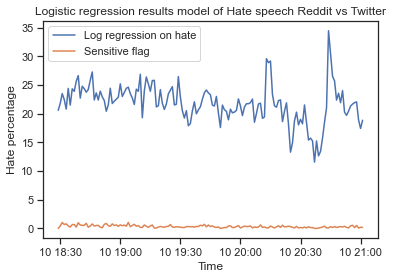

In [84]:
# Plot the sensitive twitter flag vs the hate speech models
ax=sns.lineplot(x="created", y="Hate percentage", label="Log regression on hate",
             data=tw_log_graph)
ax=sns.lineplot(x="created", y="Hate percentage", label="Sensitive flag",
             data=twitter_sensitive_graph)
plt.title("Logistic regression results model of Hate speech Reddit vs Twitter")

plt.legend()
plt.xlabel("Time")

<ipython-input-85-1a2a28394ef3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 0, 'Time')

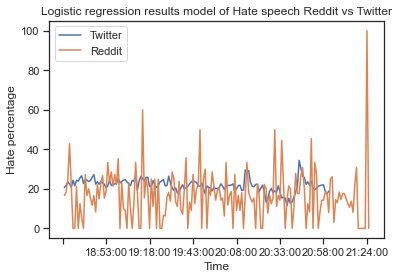

In [85]:
# More plots comparing the two
ax=sns.lineplot(x="date_f", y="Hate percentage", label="Twitter",
             data=tw_log_graph)
ax=sns.lineplot(x="date_f", y="Hate percentage", label="Reddit",
             data=reddit_log_graph)
plt.title("Logistic regression results model of Hate speech Reddit vs Twitter")
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
plt.legend()
plt.xlabel("Time")

In [128]:
twitter.sort_values(by='created', inplace = True) 
reddit.sort_values(by='date', inplace = True) 
twitter[ '6000_rolling_avg' ] = twitter.compound.rolling(6000).mean()
reddit[ '600_rolling_avg' ] = reddit.compound.rolling(600).mean()
twitter.tail()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  id created text  \
175485      175485        161878             NaN NaN     NaT  NaN   
175486      175486        166261             NaN NaN     NaT  NaN   
175487      175487        167266             NaN NaN     NaT  NaN   
175488      175488        171672             NaN NaN     NaT  NaN   
175489      175489        172500             NaN NaN     NaT  NaN   

       possibly_sensitive user verified rule  ... ddf hurtlex capital_letters  \
175485                NaN  NaN      NaN  NaN  ... NaN     NaN             NaN   
175486                NaN  NaN      NaN  NaN  ... NaN     NaN             NaN   
175487                NaN  NaN      NaN  NaN  ... NaN     NaN             NaN   
175488                NaN  NaN      NaN  NaN  ... NaN     NaN             NaN   
175489                NaN  NaN      NaN  NaN  ... NaN     NaN             NaN   

        neg  neu  pos  compound  60_rolling_avg  600_rolling_avg  \
175485  0.0  1.0  0.0       0.0        0.024723        -0.020000   
175486  0.0  1.0  0.0       0.0        0.014308        -0.020000   
175487  0.0  1.0  0.0       0.0        0.014308        -0.020000   
175488  0.0  1.0  0.0       0.0        0.022170        -0.018958   
175489  0.0  1.0  0.0       0.0        0.022170        -0.019295   

        6000_rolling_avg  
175485          0.024003  
175486          0.024135  
175487          0.024211  
175488          0.024121  
175489          0.024121  

[5 rows x 41 columns]

Text(0, 0.5, 'Compound sentiment analysis')

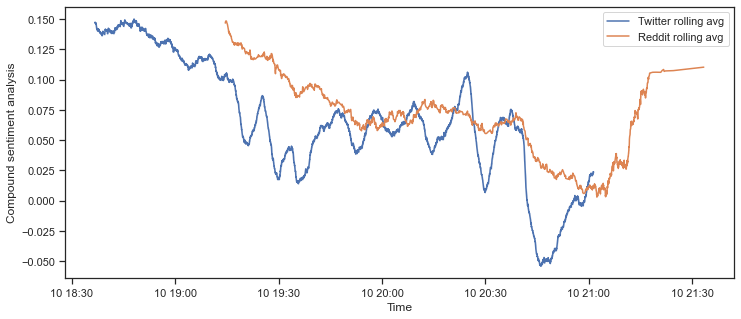

In [130]:
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# plot using rolling average

# using seaborn.lineplot()
sns.lineplot(x = 'created',
             y = '6000_rolling_avg',
             data = twitter,
             label = 'Twitter rolling avg')

sns.lineplot(x = 'date',
             y = '600_rolling_avg',
             data = reddit,
             label = 'Reddit rolling avg')
  
plt.xlabel('Time')
  
plt.title('All tweet sentiment analysis')
plt.ylabel('Compound sentiment analysis')

In [ ]:
twitter.sort_values(by='created', inplace = True) 
reddit.sort_values(by='date', inplace = True) 
twitter[ '600_rolling_avg_mbappe' ] = twitter.loc[twitter['text_nostop'].str.contains('Mbappe' or 'mbappe' or 'Mbappé' or 'mbappé', na = False)].compound.rolling(600).mean()
reddit[ '600_rolling_avg_mbappe' ] = reddit.loc[twitter['text_nostop'].str.contains('Mbappe' or 'mbappe' or 'Mbappé' or 'mbappé', na = False)].compound.rolling(600).mean()
twitter.tail()

plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# plot using rolling average

# using seaborn.lineplot()
sns.lineplot(x = 'created',
             y = '6000_rolling_avg_mbappe',
             data = twitter,
             label = 'Twitter rolling avg')

sns.lineplot(x = 'date',
             y = '600_rolling_avg',
             data = reddit,
             label = 'Reddit rolling avg_mbappe')
  
plt.xlabel('Time')
  
plt.title('Mbappé tweet sentiment analysis')
plt.ylabel('Compound sentiment analysis')

In [ ]:
twitter.sort_values(by='created', inplace = True) 
reddit.sort_values(by='date', inplace = True) 
twitter[ '600_rolling_avg_saka' ] = twitter.loc[twitter['text_nostop'].str.contains('Saka' or 'saka', na = False)].compound.rolling(600).mean()
reddit[ '600_rolling_avg_saka' ] = reddit.loc[twitter['text_nostop'].str.contains('Saka' or 'saka', na = False)].compound.rolling(600).mean()
twitter.tail()

plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# plot using rolling average

# using seaborn.lineplot()
sns.lineplot(x = 'created',
             y = '600_rolling_avg_saka',
             data = twitter,
             label = 'Twitter rolling avg')

sns.lineplot(x = 'date',
             y = '600_rolling_avg',
             data = reddit,
             label = 'Reddit rolling avg_saka')
  
plt.xlabel('Time')
  
plt.title('Saka tweet sentiment analysis')
plt.ylabel('Compound sentiment analysis')

In [86]:
twitter.loc[twitter['text'].str.contains('black', na =False)]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1            id  \
731            731           731          2460.0  1.601650e+18   
846            846           847          2825.0  1.601650e+18   
1457          1457          1458          5107.0  1.601650e+18   
3265          3265          3266         11446.0  1.601650e+18   
3552          3552          3553         12485.0  1.601650e+18   
...            ...           ...             ...           ...   
174814      174814        174857        498033.0  1.601680e+18   
174850      174850        174893        498128.0  1.601680e+18   
175234      175234        175277        499184.0  1.601680e+18   
175265      175265        175308        499273.0  1.601680e+18   
175365      175365        175408        499509.0  1.601680e+18   

                         created  \
731    2022-12-10 18:30:43+00:00   
846    2022-12-10 18:30:50+00:00   
1457   2022-12-10 18:31:35+00:00   
3265   2022-12-10 18:33:37+00:00   
3552   2022-12-10 18:33:58+00:00   
...                          ...   
174814 2022-12-10 21:00:58+00:00   
174850 2022-12-10 21:00:58+00:00   
175234 2022-12-10 21:01:16+00:00   
175265 2022-12-10 21:01:17+00:00   
175365 2022-12-10 21:01:21+00:00   

                                                     text possibly_sensitive  \
731                                                I h...      Not sensitive   
846           Exactly what is white supremacy? I see b...      Not sensitive   
1457                             Morocco uses black magic      Not sensitive   
3265    Ok im not really into football, I live in Fran...      Not sensitive   
3552      THE IRONY! South Africa is currently on stag...      Not sensitive   
...                                                   ...                ...   
174814  Wheres all the disgusting english racist fans ...      Not sensitive   
174850  Gc’s England, at least they can’t bully the bl...      Not sensitive   
175234  Congrats England, you get to blame the black g...      Not sensitive   
175265   That’s it. Deport all the blacks out of England.      Not sensitive   
175365  "Before the USA played Wales on Nov. 21, he ha...      Not sensitive   

                                             user verified            rule  \
731                             Nancy Kemp Jordan    False         Players   
846                                  Large Amoeba    False  England France   
1457                                           Ma    False        Worldcup   
3265    Oh!LaLa! Mama#FBPE #GTTO #AGC🌈🇫🇷🇪🇺🇺🇦🕷#blm    False         Players   
3552                                          xal    False         Players   
...                                           ...      ...             ...   
174814                                    S Wavey    False         Players   
174850                                    ZeenoEU    False  England France   
175234                                Mark Rankin    False  England France   
175265                                      Peter    False  England France   
175365                         Rebecca St. Pierre    False        Worldcup   

        ...   ps   pa  rci  ddf hurtlex  capital_letters    neg    neu    pos  \
731     ...  1.0  0.0  0.0  0.0     0.0              6.0  0.166  0.686  0.149   
846     ...  2.0  0.0  0.0  0.0     0.0              5.0  0.183  0.716  0.101   
1457    ...  1.0  0.0  0.0  0.0     0.0              1.0  0.000  1.000  0.000   
3265    ...  1.0  0.0  0.0  0.0     0.0             12.0  0.057  0.511  0.432   
3552    ...  2.0  0.0  0.0  0.0     0.0             14.0  0.151  0.849  0.000   
...     ...  ...  ...  ...  ...     ...              ...    ...    ...    ...   
174814  ...  1.0  0.0  0.0  0.0     0.0              2.0  0.542  0.458  0.000   
174850  ...  1.0  0.0  0.0  0.0     0.0              2.0  0.314  0.686  0.000   
175234  ...  1.0  0.0  0.0  1.0     1.0              2.0  0.174  0.580  0.246   
175265  ...  1.0  0.0  0.0  0.0     0.0              3.0  0.000  1.000  0.

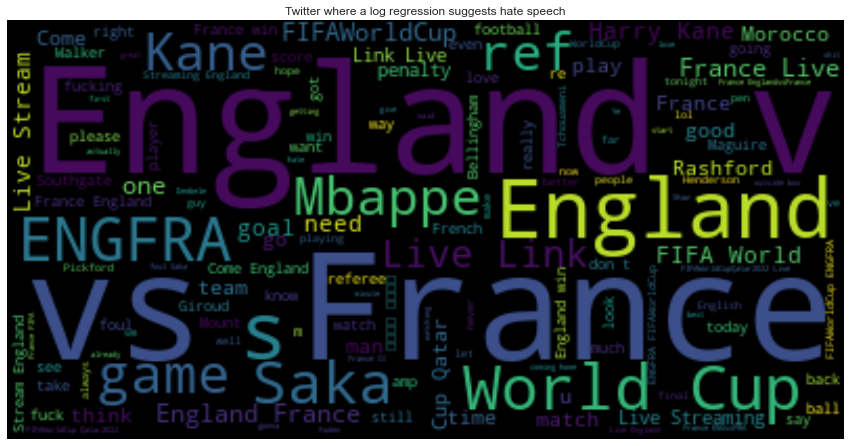

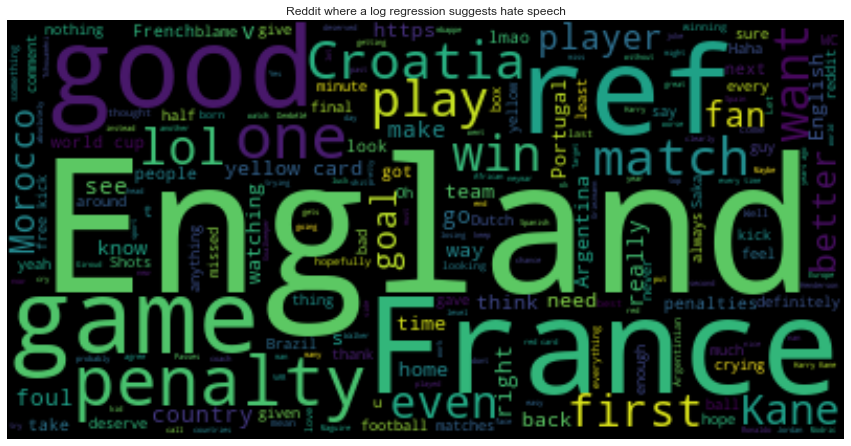

In [88]:

text = " ".join(i for i in twitter['text_nostop'].loc[(twitter['log_regression']=='Hate') & (twitter['text_nostop'].notnull())])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where a log regression suggests hate speech")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[(reddit['log_regression']=='Hate') & (twitter['text_nostop'].notnull())])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where a log regression suggests hate speech")
plt.show()

In [67]:
twitter.tail()

Unnamed: 0  Unnamed: 0.1 Unnamed: 0.1.1 id created text  \
175485      175485        161878                                  
175486      175486        166261                                  
175487      175487        167266                                  
175488      175488        171672                                  
175489      175489        172500                                  

       possibly_sensitive user verified rule  ... ps pa rci ddf hurtlex  \
175485                                        ...                         
175486                                        ...                         
175487                                        ...                         
175488                                        ...                         
175489                                        ...                         

       capital_letters  neg  neu  pos compound  
175485                  0.0  1.0  0.0      0.0  
175486                  0.0  1.0  0.0      0.0  
175487                  0.0  1.0  0.0      0.0  
175488                  0.0  1.0  0.0      0.0  
175489                  0.0  1.0  0.0      0.0  

[5 rows x 38 columns]

In [61]:
twitter['log_regression']

0         Not hate
1             Hate
2         Not hate
3         Not hate
4         Not hate
            ...   
175485    Not hate
175486    Not hate
175487    Not hate
175488    Not hate
175489    Not hate
Name: log_regression, Length: 175490, dtype: object

In [49]:
twitter['text'].loc[twitter['text'].str.contains('black', na =False)]

731                                                  I h...
846             Exactly what is white supremacy? I see b...
1457                               Morocco uses black magic
3265      Ok im not really into football, I live in Fran...
3552        THE IRONY! South Africa is currently on stag...
                                ...                        
174814    Wheres all the disgusting english racist fans ...
174850    Gc’s England, at least they can’t bully the bl...
175234    Congrats England, you get to blame the black g...
175265     That’s it. Deport all the blacks out of England.
175365    "Before the USA played Wales on Nov. 21, he ha...
Name: text, Length: 358, dtype: object

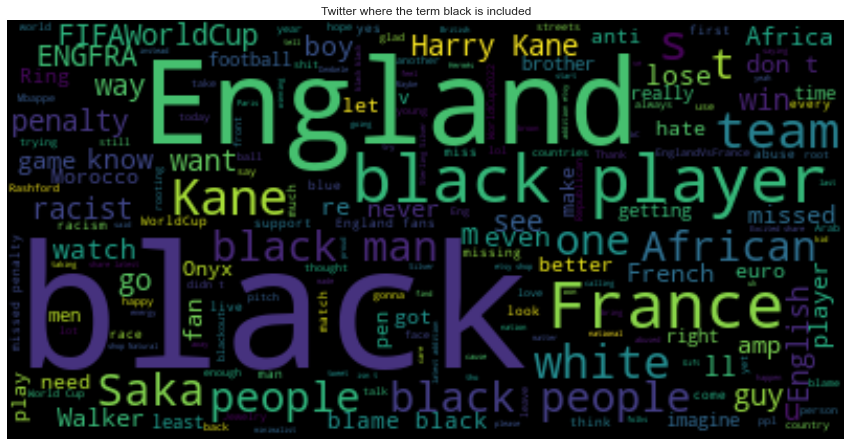

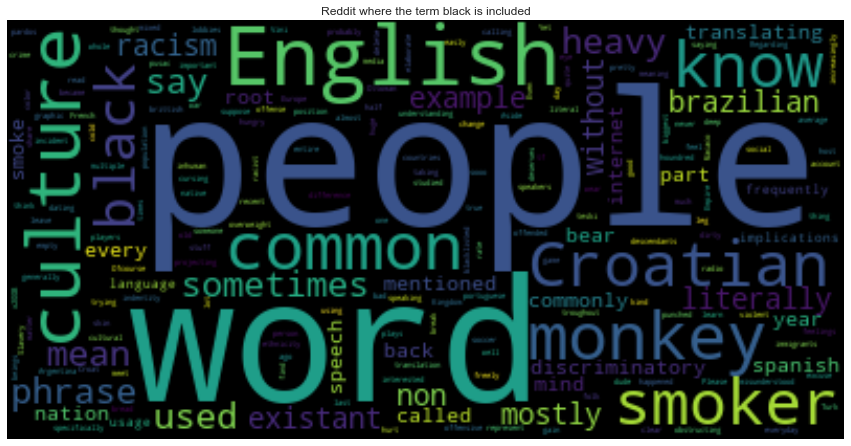

In [51]:
text = " ".join(i for i in twitter['text_nostop'].loc[twitter['text_nostop'].str.contains('black', na = False)])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the term black is included")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[reddit['text_nostop'].str.contains('black', na = False)])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the term black is included")
plt.show()

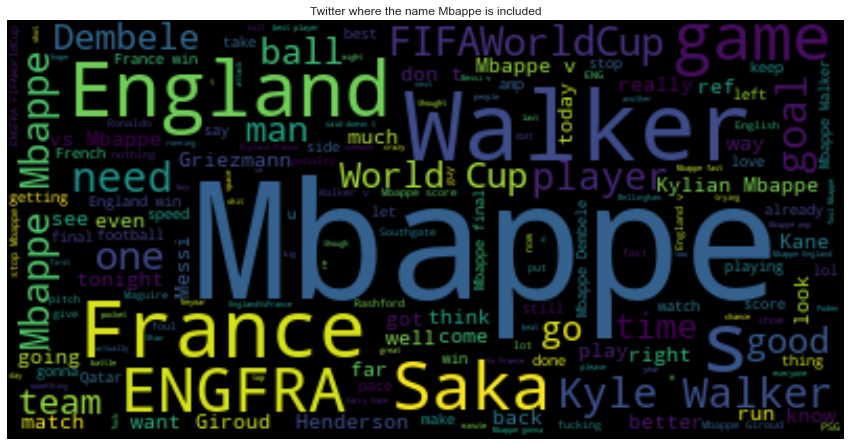

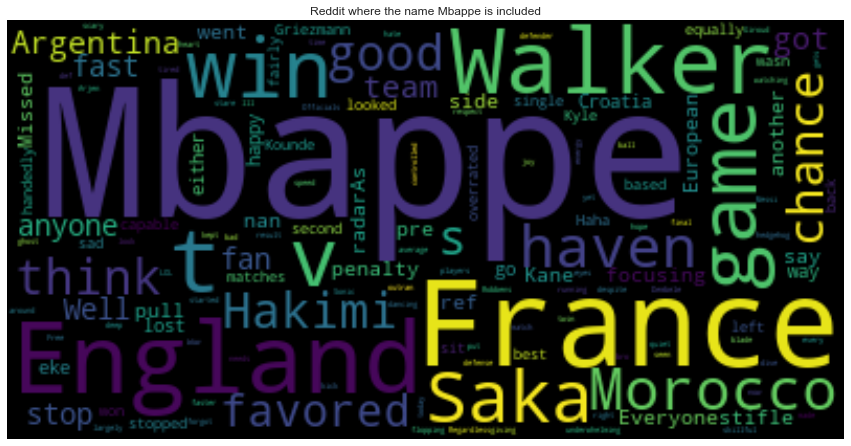

In [53]:
text = " ".join(i for i in twitter['text_nostop'].loc[twitter['text_nostop'].str.contains('Mbappe' or 'mbappe' or 'Mbappé' or 'mbappé', na = False)])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the name Mbappe is included")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[reddit['text_nostop'].str.contains('Mbappe' or 'mbappe' or 'Mbappé' or 'mbappé', na = False)])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the name Mbappe is included")
plt.show()

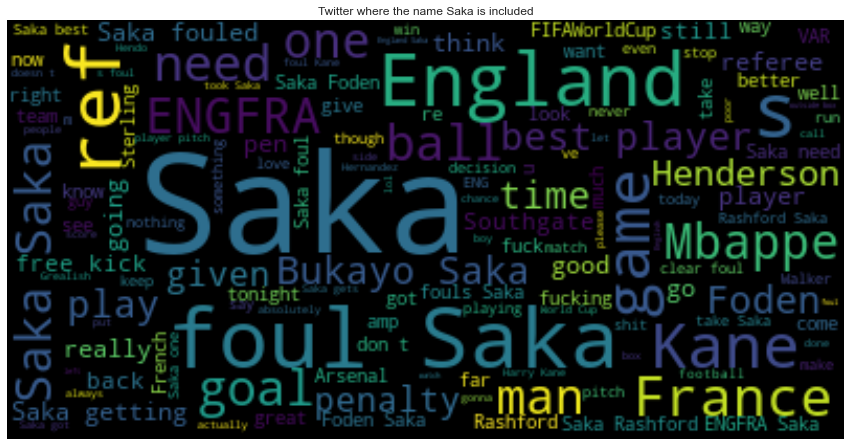

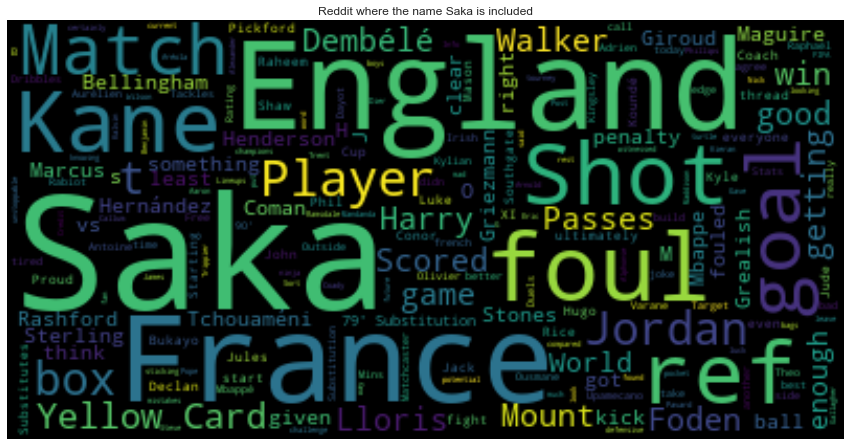

In [54]:
text = " ".join(i for i in twitter['text_nostop'].loc[twitter['text_nostop'].str.contains('Saka' or "saka", na = False)])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the name Saka is included")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[reddit['text_nostop'].str.contains("Saka" or "saka", na = False)])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the name Saka is included")
plt.show()

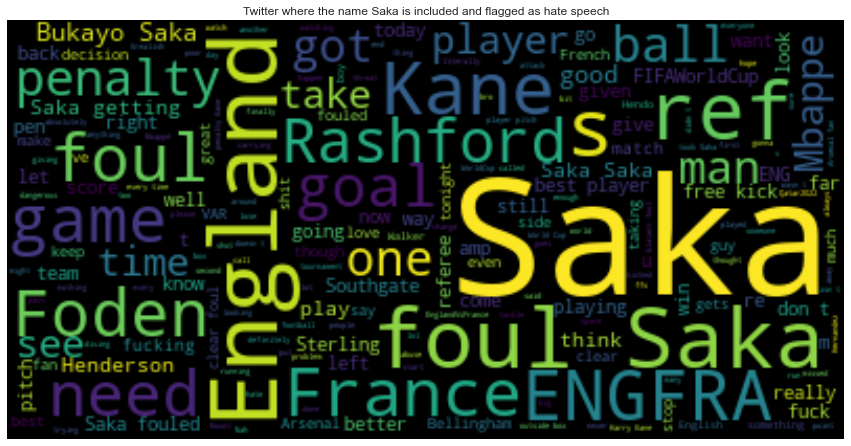

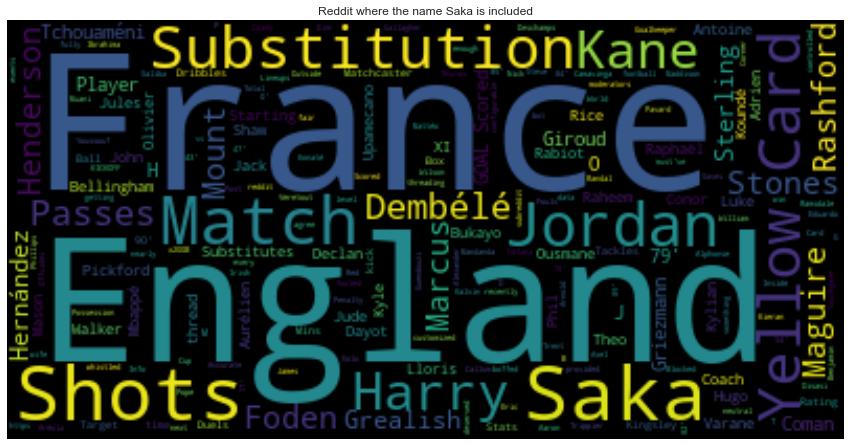

In [57]:
text = " ".join(i for i in twitter['text_nostop'].loc[(twitter['text_nostop'].str.contains('Saka' or "saka", na = False)) & (twitter['log_regression']=='Hate')])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the name Saka is included and flagged as hate speech")
plt.show()

text = " ".join(i for i in reddit['text_nostop'].loc[(reddit['text_nostop'].str.contains("Saka" or "saka", na = False)) & (reddit['log_regression']=='Hate')])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the name Saka is included")
plt.show()

In [ ]:
text = " ".join(i for i in twitter['text_nonstop'].loc[twitter['neural_network']=='Hate'])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where the ANN has labelled it as hate speech")
plt.show()

text = " ".join(i for i in twitter['text_nonstop'].loc[twitter['possibly_sensitive']=='Sensitive'])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Twitter where twitter has labelled it as sensitive")
plt.show()

text = " ".join(i for i in reddit['text_nonstop'].loc[reddit['text_nonstop'].str.contains('black', na = False)])

wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Reddit where the term black is included")
plt.show()

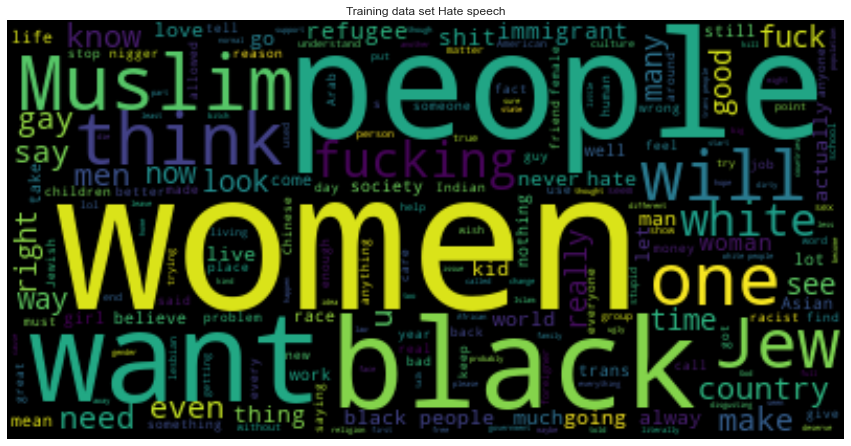

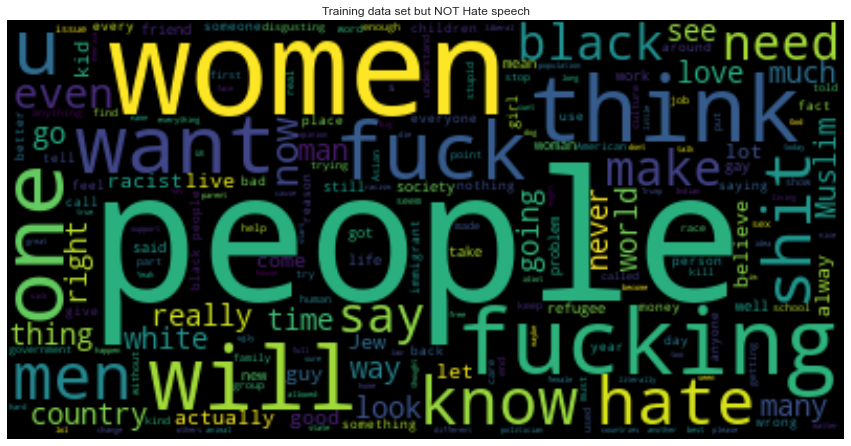

In [38]:
text = " ".join(i for i in training_data['text'].loc[training_data['Hate speech']==1])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Training data set Hate speech")
plt.show()

text = " ".join(i for i in training_data['text'].loc[training_data['Hate speech']==0])

wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Training data set but NOT Hate speech")
plt.show()